# Price Analysis of SOL and ETH

First, let's look at $SOL price action
## WEEKLY PRICE RANGE OF SOL-USD 
For the weekly price range, we substract the minimum price from the maximum price, aggregated on a weekly basis. This chart is to measure the volatility of weekly prices.

In [2]:
--WEEKLY PRICE RANGE OF SOL
WITH weekly_price AS ( 
	SELECT date_trunc('week', snapped_at) AS week, price
FROM 'sol-usd-max.csv')

SELECT week, MAX(price) - MIN(PRICE) as RANGE
FROM weekly_price
GROUP BY week

,week,RANGE
0,2020-04-06 00:00:00+00:00,0.172895
1,2020-04-20 00:00:00+00:00,0.150097
2,2020-05-25 00:00:00+00:00,0.055656
3,2020-06-15 00:00:00+00:00,0.115760
4,2020-07-06 00:00:00+00:00,0.229347
...,...,...
209,2024-02-12 00:00:00+00:00,9.552294
210,2024-02-19 00:00:00+00:00,12.123467
211,2024-03-25 00:00:00+00:00,10.459179
212,2024-04-22 00:00:00+00:00,17.733165


## WEEKLY PRICE RANGE OF ETH-USD 
For the weekly price range, we substract the minimum price from the maximum price, aggregated on a weekly basis. This chart is to measure the volatility of weekly prices.

In [3]:
--WEEKLY PRICE RANGE OF ETH
WITH weekly_price AS ( 
	SELECT date_trunc('week', snapped_at) AS week, price
FROM 'eth-usd-max.csv')

SELECT week, MAX(price) - MIN(PRICE) as RANGE
FROM weekly_price
GROUP BY week

,week,RANGE
0,2015-08-03 00:00:00+00:00,1.500870
1,2015-08-10 00:00:00+00:00,1.138389
2,2015-08-17 00:00:00+00:00,0.280324
3,2015-08-31 00:00:00+00:00,0.090598
4,2015-10-05 00:00:00+00:00,0.040756
...,...,...
453,2024-02-12 00:00:00+00:00,321.744667
454,2024-02-19 00:00:00+00:00,140.493676
455,2024-03-25 00:00:00+00:00,137.291457
456,2024-04-22 00:00:00+00:00,127.833003


## Weekly Price Fluctuations of SOL-USD
This query extracts the weekly closing price and substracts it from the weekly opening price. In the query below, 0 represents Sunday (first day of the week), and 6 represents Saturday (last day of the week). 

In [4]:
/* In this section, day of the week was extracted. */
WITH price_range AS (SELECT 
	snapped_at AS week, 
	EXTRACT(DOW FROM snapped_at) AS DOW, 
	price,
	LEAD(price) OVER (ORDER BY snapped_at) AS close_price
FROM 'sol-usd-max.csv'
WHERE EXTRACT(DOW FROM snapped_at) = 0 
	OR EXTRACT(DOW FROM snapped_at) = 6
ORDER BY 1)

SELECT 
	week,
	price - close_price AS weekly_volatility
FROM price_range
WHERE DOW = 0 
	AND price - close_price IS NOT NULL;

,week,weekly_volatility
0,2020-04-12 00:00:00+00:00,0.127262
1,2020-04-19 00:00:00+00:00,0.054207
2,2020-04-26 00:00:00+00:00,-0.069864
3,2020-05-03 00:00:00+00:00,0.103498
4,2020-05-10 00:00:00+00:00,0.045358
...,...,...
207,2024-03-31 00:00:00+00:00,19.312880
208,2024-04-07 00:00:00+00:00,25.191422
209,2024-04-14 00:00:00+00:00,-3.063816
210,2024-04-21 00:00:00+00:00,11.258086


## Weekly Price Fluctuations of ETH-USD
This query extracts the weekly closing price and substracts it from the weekly opening price. In the query below, 0 represents Sunday (first day of the week), and 6 represents Saturday (last day of the week). 

In [5]:
/* In this section, day of the week was extracted. */
WITH price_range AS (SELECT 
	snapped_at AS week, 
	EXTRACT(DOW FROM snapped_at) AS DOW, 
	price,
	LEAD(price) OVER (ORDER BY snapped_at) AS close_price
FROM 'eth-usd-max.csv'
WHERE EXTRACT(DOW FROM snapped_at) = 0 
	OR EXTRACT(DOW FROM snapped_at) = 6
ORDER BY 1)

SELECT 
	week,
	price - close_price AS weekly_volatility
FROM price_range
WHERE DOW = 0 
	AND price - close_price IS NOT NULL;

,week,weekly_volatility
0,2015-08-16 00:00:00+00:00,0.095886
1,2015-08-23 00:00:00+00:00,0.180838
2,2015-08-30 00:00:00+00:00,-0.012625
3,2015-09-06 00:00:00+00:00,0.260680
4,2015-09-13 00:00:00+00:00,0.056548
...,...,...
450,2024-03-31 00:00:00+00:00,187.379067
451,2024-04-07 00:00:00+00:00,117.338315
452,2024-04-14 00:00:00+00:00,-43.676776
453,2024-04-21 00:00:00+00:00,20.772287


## Percentage Change in SOL and BTC
This query will later be used as a common table expression in caculating the correlation between Sol price and BTC. It will also be used as a dataframe in plotting a scatter plot, which would visualize the relationship between SOL price and BTC price movements. 

In [6]:
SELECT 
	snapped_at AS day,
	(sol.price - LAG(sol.price) OVER (ORDER BY snapped_at))/LAG(sol.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_sol,
	(btc.price - LAG(btc.price) OVER (ORDER BY snapped_at))/LAG(btc.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_btc,
FROM 'sol-usd-max.csv' AS sol
LEFT JOIN 'btc-usd-max.csv' AS btc
USING(snapped_at)

,day,perc_change_sol,perc_change_btc
0,2020-04-11 00:00:00+00:00,NaN,NaN
1,2020-04-12 00:00:00+00:00,-18.054873,0.205209
2,2020-04-13 00:00:00+00:00,11.632697,0.499763
3,2020-04-14 00:00:00+00:00,-10.192098,-0.804556
4,2020-04-15 00:00:00+00:00,-15.258287,0.038498
...,...,...,...
1484,2024-05-04 00:00:00+00:00,4.085268,6.263899
1485,2024-05-05 00:00:00+00:00,1.784168,1.561301
1486,2024-05-06 00:00:00+00:00,-0.291101,0.297016
1487,2024-05-07 00:00:00+00:00,4.783688,-1.308432


## Percentage Change in ETH and BTC
This query will later be used as a common table expression in caculating the correlation between ETH price and BTC. It will also be used as a dataframe in plotting a scatter plot, which would visualize the relationship between ETH price and BTC price movements. 

In [7]:
SELECT 
	snapped_at AS day,
	(eth.price - LAG(eth.price) OVER (ORDER BY snapped_at))/LAG(eth.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_eth,
	(btc.price - LAG(btc.price) OVER (ORDER BY snapped_at))/LAG(btc.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_btc,
FROM 'eth-usd-max.csv' AS eth
LEFT JOIN 'btc-usd-max.csv' AS btc
USING(snapped_at)

,day,perc_change_eth,perc_change_btc
0,2015-08-07 00:00:00+00:00,NaN,NaN
1,2015-08-08 00:00:00+00:00,-53.003934,-6.717233
2,2015-08-10 00:00:00+00:00,-48.330963,1.453988
3,2015-08-11 00:00:00+00:00,55.235757,2.385857
4,2015-08-12 00:00:00+00:00,17.728878,-0.798246
...,...,...,...
3192,2024-05-04 00:00:00+00:00,3.801265,6.263899
3193,2024-05-05 00:00:00+00:00,0.414939,1.561301
3194,2024-05-06 00:00:00+00:00,0.691866,0.297016
3195,2024-05-07 00:00:00+00:00,-2.294978,-1.308432


In [8]:
-- SOL price in relation to BTC price, following SOL's start date
WITH price_changes AS (SELECT 
	snapped_at AS day,
	(sol.price - LAG(sol.price) OVER (ORDER BY snapped_at))/LAG(sol.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_sol,
	(btc.price - LAG(btc.price) OVER (ORDER BY snapped_at))/LAG(btc.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_btc,
FROM 'sol-usd-max.csv' AS sol
LEFT JOIN 'btc-usd-max.csv' AS btc
USING(snapped_at))

SELECT CORR(perc_change_sol, perc_change_btc) AS correlation
FROM price_changes

,correlation
0,0.488204


In [9]:
-- ETH price in relation to BTC price, following SOL's start date
WITH price_changes AS (SELECT 
	snapped_at AS day,
	(eth.price - LAG(eth.price) OVER (ORDER BY snapped_at))/LAG(eth.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_eth,
	(btc.price - LAG(btc.price) OVER (ORDER BY snapped_at))/LAG(btc.price) OVER (ORDER BY snapped_at) * 100 AS perc_change_btc,
FROM 'eth-usd-max.csv' AS eth
LEFT JOIN 'btc-usd-max.csv' AS btc
USING(snapped_at))

SELECT CORR(perc_change_eth, perc_change_btc) AS correlation
FROM price_changes

,correlation
0,0.564886


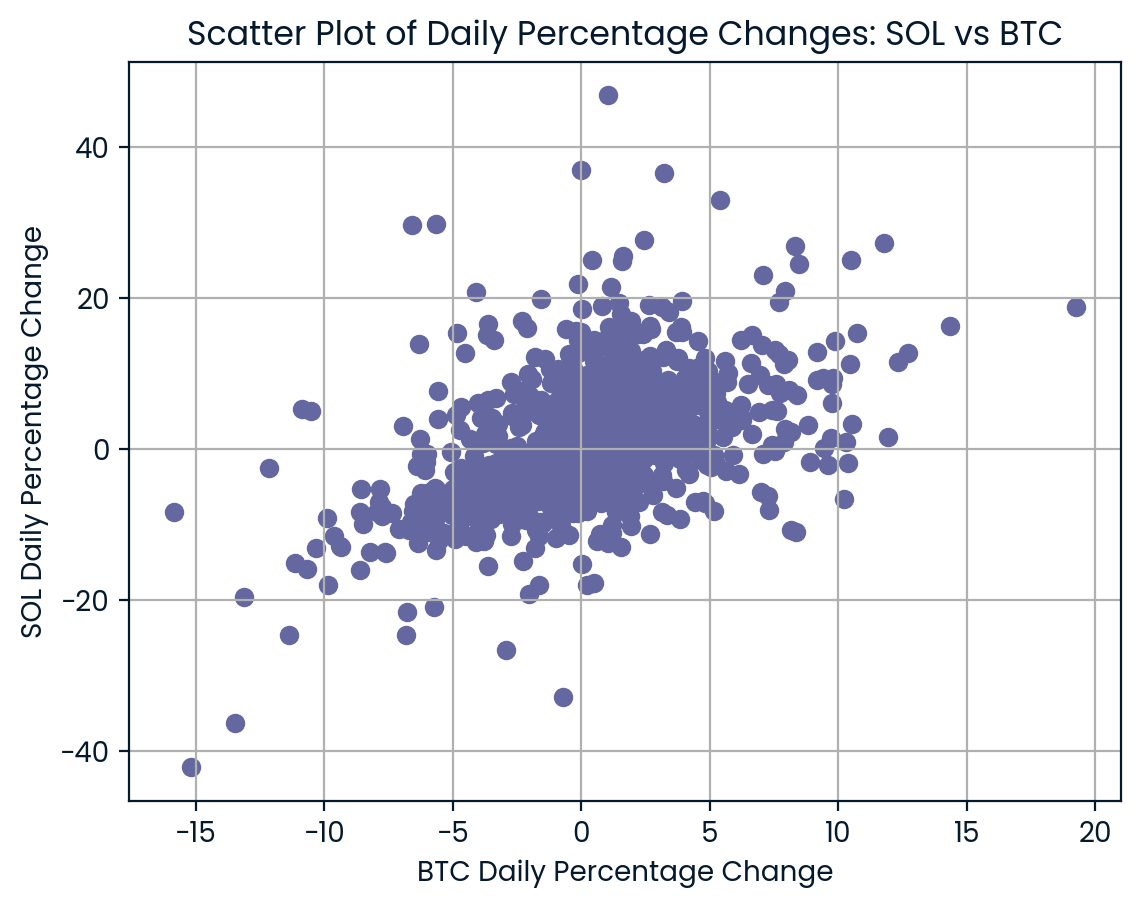

In [10]:
#scatter plot to visualize Sol price vs Btc price
import matplotlib.pyplot as plt
plt.scatter(df3['perc_change_btc'], df3['perc_change_sol'])
plt.ylabel('SOL Daily Percentage Change')
plt.xlabel('BTC Daily Percentage Change')
plt.title('Scatter Plot of Daily Percentage Changes: SOL vs BTC')
plt.grid(True)
plt.show()

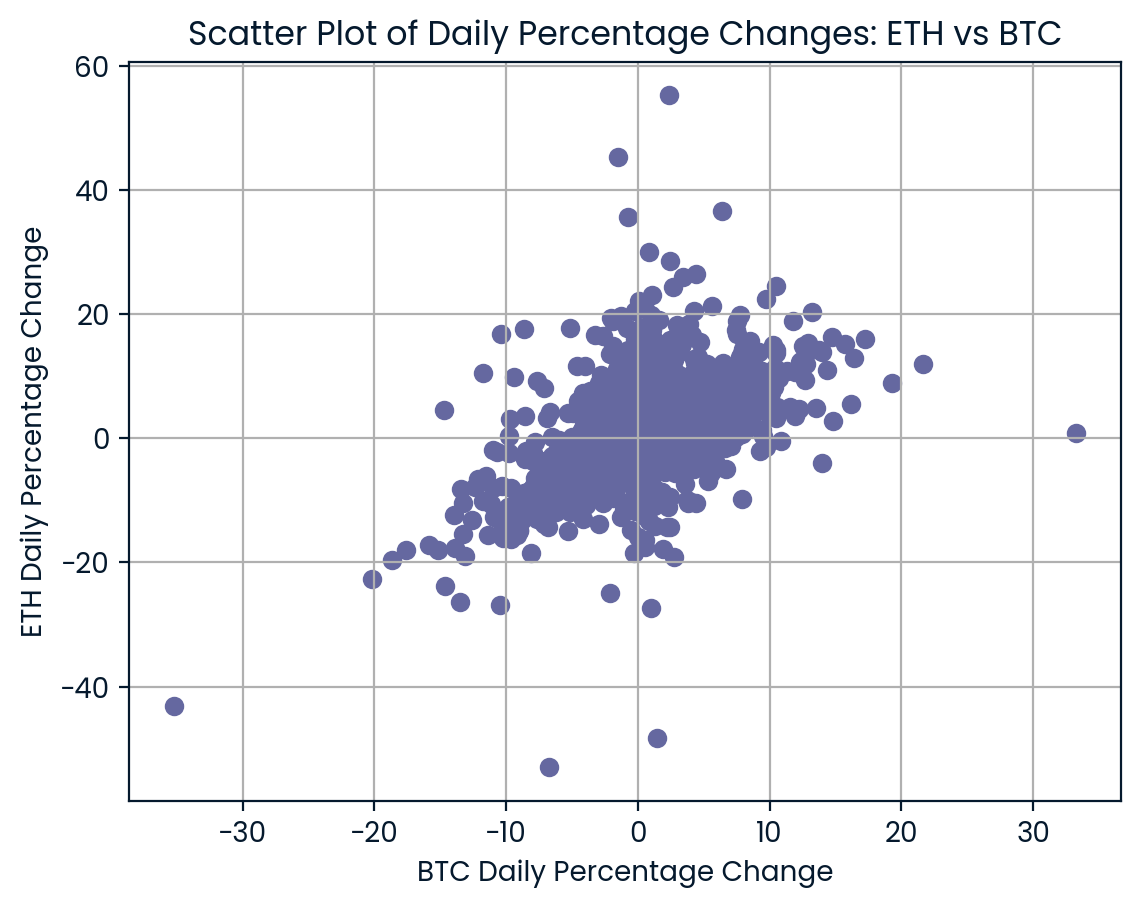

In [11]:
#scatter plot to visualize Sol price vs Btc price
import matplotlib.pyplot as plt
plt.scatter(df6['perc_change_btc'], df6['perc_change_eth'])
plt.ylabel('ETH Daily Percentage Change')
plt.xlabel('BTC Daily Percentage Change')
plt.title('Scatter Plot of Daily Percentage Changes: ETH vs BTC')
plt.grid(True)
plt.show()

In [12]:
-- This SQL code calculates the price growth rates for Solana (SOL) and Ethereum (ETH) over time.
-- It performs the following steps:

-- 1. Creates a Common Table Expression (CTE) named 'growth_rate' to compute the price values and their lagged values.
WITH growth_rate AS (
    SELECT 
        snapped_at,  -- Timestamp of the snapshot
        sol.price AS s1,  -- Current price of Solana
        LAG(sol.price) OVER(order by snapped_at) AS s2,  -- Previous price of Solana
        eth.price as e1,  -- Current price of Ethereum
        LAG(eth.price) OVER(order by snapped_at) AS e2  -- Previous price of Ethereum
    FROM 'sol-usd-max.csv' AS sol  -- Solana market cap data
    LEFT JOIN 'eth-usd-max.csv' AS eth  -- Ethereum market cap data
    USING(snapped_at)  -- Join on the 'snapped_at' column
)

-- 2. Selects the snapshot timestamp and calculates the growth rates for Solana and Ethereum.
SELECT 
    snapped_at,  -- Timestamp of the snapshot
    (s1 - s2)/s2 * 100 AS sol_price_growth,  -- Growth rate of Solana's price
    (e1 - e2)/e2 * 100 AS eth_price_growth  -- Growth rate of Ethereum's price
FROM growth_rate
WHERE snapped_at >= '2023-11-10'  -- Filters the results to include only snapshots on or after November 10, 2023

,snapped_at,sol_price_growth,eth_price_growth
0,2023-11-10 00:00:00+00:00,4.875915,12.536017
1,2023-11-11 00:00:00+00:00,24.945288,-2.337490
2,2023-11-12 00:00:00+00:00,-0.358303,-1.243901
3,2023-11-13 00:00:00+00:00,-0.897253,-0.336460
4,2023-11-14 00:00:00+00:00,-6.705954,0.706020
...,...,...,...
176,2024-05-04 00:00:00+00:00,4.085268,3.801265
177,2024-05-05 00:00:00+00:00,1.784168,0.414939
178,2024-05-06 00:00:00+00:00,-0.291101,0.691866
179,2024-05-07 00:00:00+00:00,4.783688,-2.294978


,snapped_at,sol_price_growth,eth_price_growth
0,2023-11-10 00:00:00+00:00,4.875915,12.536017
1,2023-11-11 00:00:00+00:00,24.945288,-2.337490
2,2023-11-12 00:00:00+00:00,-0.358303,-1.243901
3,2023-11-13 00:00:00+00:00,-0.897253,-0.336460
4,2023-11-14 00:00:00+00:00,-6.705954,0.706020
...,...,...,...
176,2024-05-04 00:00:00+00:00,4.085268,3.801265
177,2024-05-05 00:00:00+00:00,1.784168,0.414939
178,2024-05-06 00:00:00+00:00,-0.291101,0.691866
179,2024-05-07 00:00:00+00:00,4.783688,-2.294978


In [18]:
SELECT snapped_at, sol.price/eth.price AS price_ratio
FROM 'sol-usd-max.csv' AS sol
LEFT JOIN 'eth-usd-max.csv' AS eth
USING(snapped_at)
WHERE snapped_at BETWEEN '2023-05-10' AND '2024-05-10'

,snapped_at,price_ratio
0,2023-05-10 00:00:00+00:00,0.011190
1,2023-05-11 00:00:00+00:00,0.011382
2,2023-05-13 00:00:00+00:00,0.011566
3,2023-05-14 00:00:00+00:00,0.011629
4,2023-05-16 00:00:00+00:00,0.011559
...,...,...
360,2023-08-02 00:00:00+00:00,0.012796
361,2023-08-05 00:00:00+00:00,0.012475
362,2024-01-08 00:00:00+00:00,0.040053
363,2024-05-03 00:00:00+00:00,0.046148


In [28]:
WITH price_r AS (
    SELECT snapped_at, sol.price/eth.price AS price_ratio
    FROM 'sol-usd-max.csv' AS sol
    LEFT JOIN 'eth-usd-max.csv' AS eth
    USING(snapped_at)
),

ratio AS (SELECT
  ROUND(MAX(price_ratio), 2) AS maximum_ratio,
  (SELECT ROUND(price_ratio,2)
   FROM price_r
   ORDER BY snapped_at ASC
   LIMIT 1
  ) AS earliest_ratio
FROM price_r)

SELECT *, maximum_ratio - earliest_ratio AS difference, 
       (maximum_ratio - earliest_ratio)/earliest_ratio * 100 AS ratio_change_percentage
FROM ratio

,maximum_ratio,earliest_ratio,difference,ratio_change_percentage
0,0.06,0.01,0.05,500.0


In [31]:
WITH mcap_r AS (
    SELECT snapped_at, sol.market_cap/eth.market_cap AS mcap_ratio
    FROM 'sol-usd-max.csv' AS sol
    LEFT JOIN 'eth-usd-max.csv' AS eth
    USING(snapped_at)
),

ratio AS (SELECT
  ROUND(MAX(mcap_ratio), 4) AS maximum_ratio,
  (SELECT ROUND(mcap_ratio,4)
   FROM mcap_r
   ORDER BY snapped_at ASC
   LIMIT 1
  ) AS earliest_ratio
FROM mcap_r)

SELECT *, maximum_ratio - earliest_ratio AS difference, 
       (maximum_ratio - earliest_ratio)/earliest_ratio * 100 AS ratio_change_percentage
FROM ratio

,maximum_ratio,earliest_ratio,difference,ratio_change_percentage
0,0.2074,0.0005,0.2069,41380.0


In [37]:
with ratios as (SELECT snapped_at, sol.price/eth.price AS price_ratio
    FROM 'sol-usd-max.csv' AS sol
    LEFT JOIN 'eth-usd-max.csv' AS eth
    USING(snapped_at))
	
SELECT snapped_at, (new - old)/old *100 AS price_growth FROM
(SELECT snapped_at, price_ratio AS new, lag(price_ratio) over(order by snapped_at ASC) as old
from ratios
order by snapped_at asc) AS new_old

,snapped_at,price_growth
0,2020-04-11 00:00:00+00:00,NaN
1,2020-04-12 00:00:00+00:00,-18.359057
2,2020-04-13 00:00:00+00:00,11.256090
3,2020-04-14 00:00:00+00:00,-8.952756
4,2020-04-15 00:00:00+00:00,-16.096666
...,...,...
1484,2024-05-04 00:00:00+00:00,0.273603
1485,2024-05-05 00:00:00+00:00,1.363571
1486,2024-05-06 00:00:00+00:00,-0.976213
1487,2024-05-07 00:00:00+00:00,7.244936


In [38]:
with ratios as (SELECT snapped_at, sol.market_cap/eth.market_cap AS mcap_ratio
    FROM 'sol-usd-max.csv' AS sol
    LEFT JOIN 'eth-usd-max.csv' AS eth
    USING(snapped_at))
	
SELECT snapped_at, (new - old)/old *100 AS mcap_growth FROM
(SELECT snapped_at, mcap_ratio AS new, lag(mcap_ratio) over(order by snapped_at ASC) as old
from ratios
order by snapped_at asc) AS new_old

,snapped_at,mcap_growth
0,2020-04-11 00:00:00+00:00,NaN
1,2020-04-12 00:00:00+00:00,-21.646884
2,2020-04-13 00:00:00+00:00,15.762897
3,2020-04-14 00:00:00+00:00,-10.934308
4,2020-04-15 00:00:00+00:00,-16.972297
...,...,...
1484,2024-05-04 00:00:00+00:00,0.305603
1485,2024-05-05 00:00:00+00:00,1.471720
1486,2024-05-06 00:00:00+00:00,-1.052613
1487,2024-05-07 00:00:00+00:00,7.206666


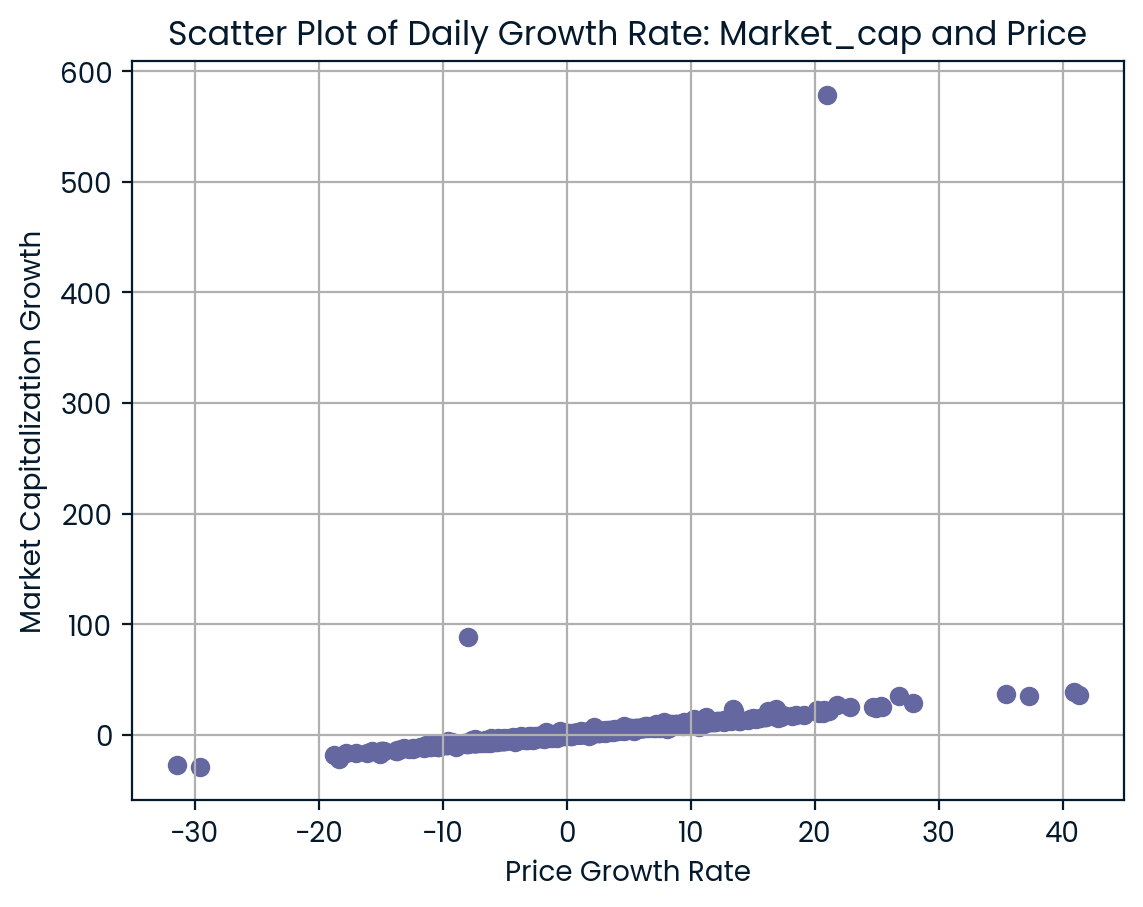

In [43]:
#scatter plot to visualize Sol price vs Btc price
import matplotlib.pyplot as plt
plt.scatter(df12['price_growth'], df13['mcap_growth'])
plt.ylabel('Market Capitalization Growth')
plt.xlabel('Price Growth Rate')
plt.title('Scatter Plot of Daily Growth Rate: Market_cap and Price')
plt.grid(True)
plt.show()

In [52]:
SELECT corr(500, 41380);

,"corr(500, 41380)"
0,NaN
